In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.set_printoptions(suppress=True, linewidth=200)

In [125]:
data=np.load("./data/250_50_sdf_based_collision.npz")

In [126]:
sdf = np.load("./data/obstacles_1_sdf.npz")
sdf = sdf['sdf'].squeeze()

In [127]:
u = data['actions']
tail = data['states'][:, :, 0:2]
mid = data['states'][:, :, 2:4]
head = data['states'][:, :, 4:6]
constraints = data['constraints']

(-4.913913467757542,
 -4.205365097124866,
 -4.213540349225997,
 -3.2073413409897764)

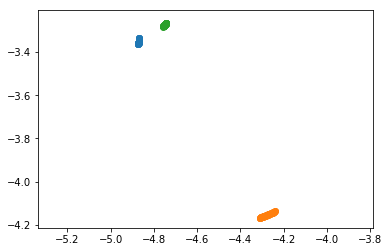

In [128]:
worst_idx = 179
plt.scatter(tail[worst_idx,:,0], tail[worst_idx,:,1])
plt.scatter(mid[worst_idx,:,0], mid[worst_idx,:,1])
plt.scatter(head[worst_idx,:,0], head[worst_idx,:,1])
plt.axis("equal")

In [42]:
def make_constraint_mask(arr, axis=1):
    """ takes in a 2d array and returns two lists of indeces all elements before the first constriant violation """
    # arr = arr.squeeze()
    invalid_val = arr.shape[1]
    mask = arr != 0
    indeces_of_first_violation = np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)
    batch_indeces = []
    time_indeces = []
    for batch_index, index_of_first_violation in enumerate(indeces_of_first_violation):
        for index_with_no_violation in range(index_of_first_violation):
            batch_indeces.append(batch_index)
            time_indeces.append(index_with_no_violation)

    return batch_indeces, time_indeces 

In [166]:
def plot(traj_idx):
    bi, ti = make_constraint_mask(np.expand_dims(constraints[traj_idx], axis=0))
    bi = np.ones_like(bi) * traj_idx
    head_no_collision = np.expand_dims(head[bi, ti], axis=0)
    plt.figure(figsize=(6,6))
    plt.imshow(np.flipud(sdf.T), extent=[-5,5,-5,5])
    plt.scatter(head[traj_idx,:,0], head[traj_idx,:,1], c='k', s=50)
    plt.scatter(mid[traj_idx,:,0], mid[traj_idx,:,1], c='r', s=50)
    plt.scatter(tail[traj_idx,:,0], tail[traj_idx,:,1], c='m', s=10)
    c = cm.rainbow(np.linspace(0, 1, len(head_no_collision[0])))
    plt.scatter(head_no_collision[0,:,0], head_no_collision[0,:,1], c=c, s=10)
    p = head[traj_idx,0]
    predictions = []
    dp = np.dot(np.eye(2), u[traj_idx,0]) * 0.1
    for t in range(50):
        predictions.append(p)
        p = p + dp
    predictions = np.array(predictions)
    plt.scatter(predictions[:,0], predictions[:,1], s=15)
        
    plt.axis("equal");

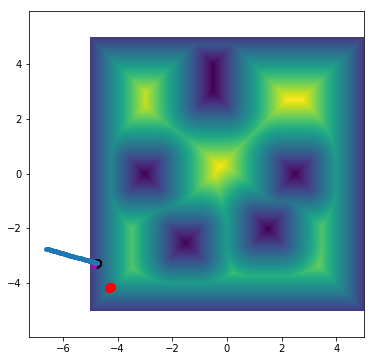

In [167]:
plot(179)

In [168]:
bad_trajs = [37,82,85,110,135,159,163,177,179,186]

In [169]:
for i in bad_trajs:
    print(constraints[i].T)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

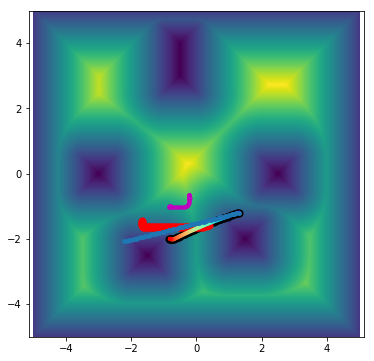

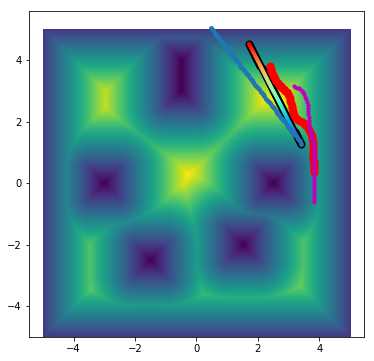

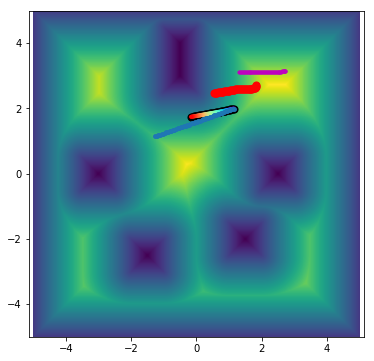

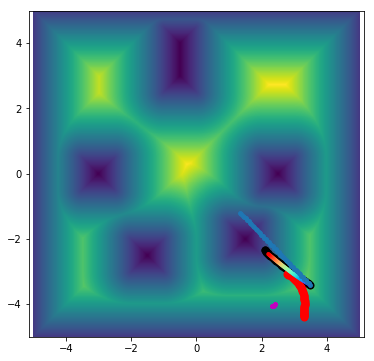

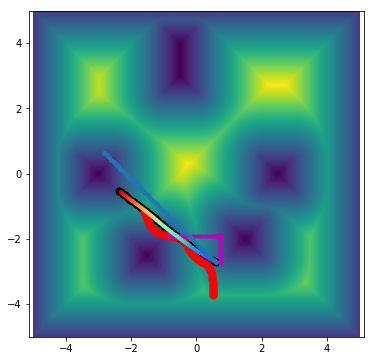

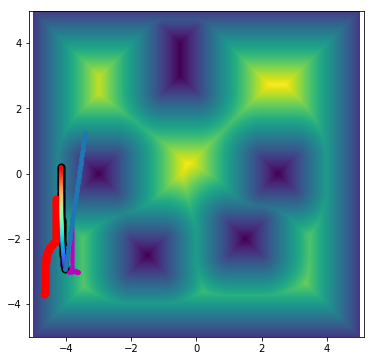

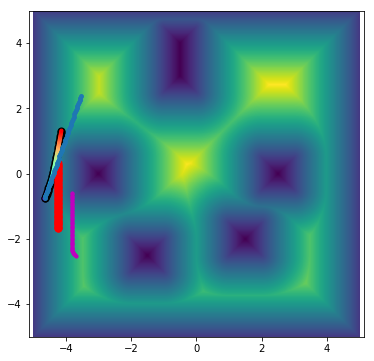

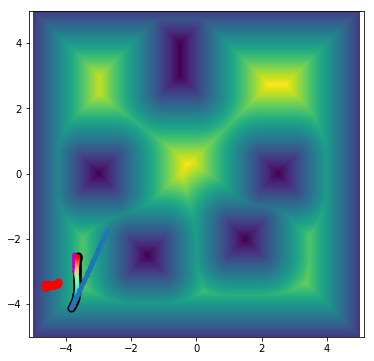

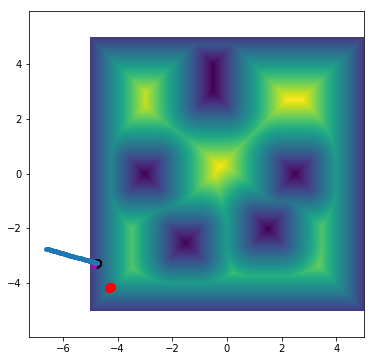

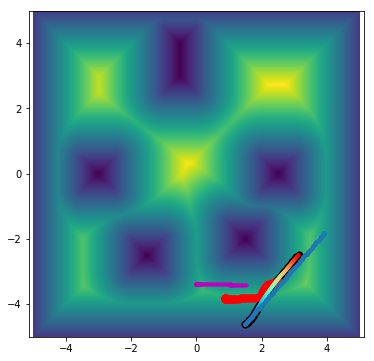

In [170]:
for i in bad_trajs:
    plot(i)